# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [13]:
app_train.dtypes.reset_index().groupby(0).aggregate('count').reset_index()

,0,index
0,int64,41
1,float64,65
2,object,16


In [39]:
float_features=[]
for i, j in zip(app_train.dtypes, app_train.columns):
    if i == 'float':
        float_features.append(j)
float_features[0:5]

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE']

In [36]:
print('mean: ', app_train['AMT_INCOME_TOTAL'].mean(), 
     '\nstd: ', app_train['AMT_INCOME_TOTAL'].std(), 
     '\nmax: ', app_train['AMT_INCOME_TOTAL'].max(),
     '\nmin: ', app_train['AMT_INCOME_TOTAL'].min())

mean:  168797.9192969845 
std:  237123.14627883647 
max:  117000000.0 
min:  25650.0


In [40]:
app_train['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [29]:
import seaborn as sns
import numpy as np

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


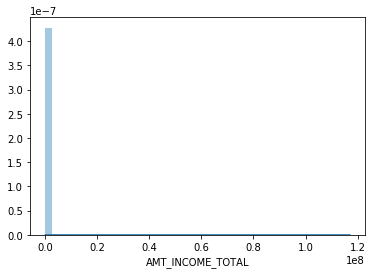

In [32]:
sns.distplot(app_train['AMT_INCOME_TOTAL'])

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


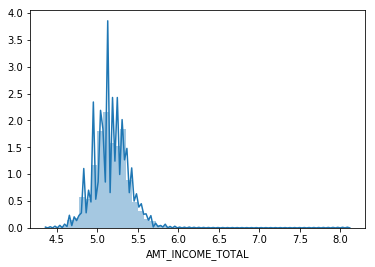

In [26]:
sns.distplot(np.log10(app_train['AMT_INCOME_TOTAL']))

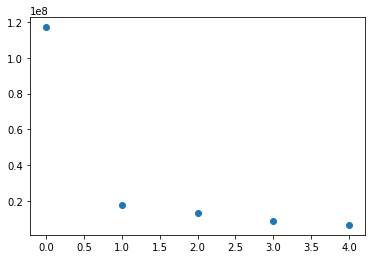

In [48]:
# maximum five
plt.scatter(range(5), app_train['AMT_INCOME_TOTAL'].sort_values(asciiending=False)[0:5])

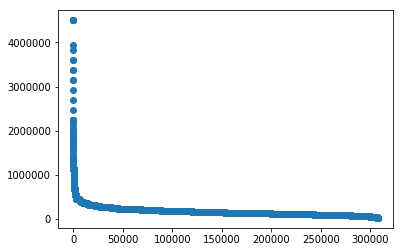

In [47]:
# others
plt.scatter(range(len(app_train)-5), app_train['AMT_INCOME_TOTAL'].sort_values(ascending=False)[5:])